In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn

import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [ ]:
data="/content/EB_Bill (1).csv"
read = pd.read_csv(data)
read

,Date,Entry Date,Status,KWH,KVAH,Recorded\nDemand,Power\nFactor,in Units,CC Charges,Electy.\nTax,...,PF\nPenalty,Fixed\nCharges,15=9+..+14,Advance\nAmount\nPaid,Adjustment,Amount To Be\npaid,Due\nDate,Amount\nPaid,Receipt\nNo,Date.1
0,13/03/2024,14/03/2024,NORMAL,7004,0,1.00,0.0,189,200.25,0.0,...,0,0.0,200,0,0,200,02/04/2024,200,PGIBP1120818222,23/03/2024
1,12/01/2024,12/01/2024,NORMAL,6815,0,1.00,0.0,168,153.00,0.0,...,0,0.0,153,0,0,153,01/02/2024,153,PGIBP1113637612,12/01/2024
2,15/11/2023,16/11/2023,NORMAL,6647,0,0.00,0.0,247,436.50,0.0,...,0,0.0,437,0,0,436,05/12/2023,436,PGIBP1108476823,17/11/2023
3,13/09/2023,13/09/2023,NORMAL,6400,0,0.00,0.0,310,720.00,0.0,...,0,0.0,720,0,0,720,03/10/2023,720,PGIBP1102053781,18/09/2023
4,12/07/2023,13/07/2023,NORMAL,6090,0,0.00,0.0,260,495.00,0.0,...,0,0.0,495,0,0,495,01/08/2023,495,PGIBP218367272,13/07/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,09/02/2021,09/02/2021,NORMAL,14900,0,0.68,0.0,300,500.00,0.0,...,0,30.0,530,0,0,530,01/03/2021,530,VMC007AR3S1077,26/02/2021
534,11/12/2020,11/12/2020,NORMAL,14600,0,0.68,0.0,390,770.00,0.0,...,0,30.0,800,0,0,800,31/12/2020,800,VMC007AR3S1152,31/12/2020
535,12/10/2020,12/10/2020,NORMAL,14210,0,0.68,0.0,420,860.00,0.0,...,0,30.0,890,0,0,890,02/11/2020,890,VMC007AR3S1149,27/10/2020
536,13/08/2020,13/08/2020,NORMAL,13790,0,0.68,0.0,450,950.00,0.0,...,0,30.0,980,0,0,980,02/09/2020,980,VMC007AR1S127,01/09/2020


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
consumer_data = pd.read_csv("/content/EB_Bill (1).csv")

In [ ]:
consumer_data.head()

,Date,Entry Date,Status,KWH,KVAH,Recorded\nDemand,Power\nFactor,in Units,CC Charges,Electy.\nTax,...,PF\nPenalty,Fixed\nCharges,15=9+..+14,Advance\nAmount\nPaid,Adjustment,Amount To Be\npaid,Due\nDate,Amount\nPaid,Receipt\nNo,Date.1
0,13/03/2024,14/03/2024,NORMAL,7004,0,1.0,0.0,189,200.25,0.0,...,0,0.0,200,0,0,200,02/04/2024,200,PGIBP1120818222,23/03/2024
1,12/01/2024,12/01/2024,NORMAL,6815,0,1.0,0.0,168,153.00,0.0,...,0,0.0,153,0,0,153,01/02/2024,153,PGIBP1113637612,12/01/2024
2,15/11/2023,16/11/2023,NORMAL,6647,0,0.0,0.0,247,436.50,0.0,...,0,0.0,437,0,0,436,05/12/2023,436,PGIBP1108476823,17/11/2023
3,13/09/2023,13/09/2023,NORMAL,6400,0,0.0,0.0,310,720.00,0.0,...,0,0.0,720,0,0,720,03/10/2023,720,PGIBP1102053781,18/09/2023
4,12/07/2023,13/07/2023,NORMAL,6090,0,0.0,0.0,260,495.00,0.0,...,0,0.0,495,0,0,495,01/08/2023,495,PGIBP218367272,13/07/2023


In [ ]:
energy_data.tail()

,Date,Entry Date,Status,KWH,KVAH,Recorded\nDemand,Power\nFactor,in Units,CC Charges,Electy.\nTax,...,PF\nPenalty,Fixed\nCharges,15=9+..+14,Advance\nAmount\nPaid,Adjustment,Amount To Be\npaid,Due\nDate,Amount\nPaid,Receipt\nNo,Date.1
533,09/02/2021,09/02/2021,NORMAL,14900,0,0.68,0.0,300,500.0,0.0,...,0,30.0,530,0,0,530,01/03/2021,530,VMC007AR3S1077,26/02/2021
534,11/12/2020,11/12/2020,NORMAL,14600,0,0.68,0.0,390,770.0,0.0,...,0,30.0,800,0,0,800,31/12/2020,800,VMC007AR3S1152,31/12/2020
535,12/10/2020,12/10/2020,NORMAL,14210,0,0.68,0.0,420,860.0,0.0,...,0,30.0,890,0,0,890,02/11/2020,890,VMC007AR3S1149,27/10/2020
536,13/08/2020,13/08/2020,NORMAL,13790,0,0.68,0.0,450,950.0,0.0,...,0,30.0,980,0,0,980,02/09/2020,980,VMC007AR1S127,01/09/2020
537,09/06/2020,09/06/2020,NORMAL,13340,0,0.68,0.0,660,1180.0,0.0,...,0,60.0,1240,0,0,680,29/06/2020,680,VMC007AR3S1212,29/06/2020


In [ ]:
energy_data.shape

(538, 22)

In [ ]:
energy_data.columns

Index(['Date', 'Entry Date', 'Status', 'KWH', 'KVAH', 'Recorded\nDemand',
       'Power\nFactor', 'in Units', 'CC Charges', 'Electy.\nTax', 'Welding',
       'Excess Demand', 'PF\nPenalty', 'Fixed\nCharges', '15=9+..+14',
       'Advance\nAmount\nPaid', 'Adjustment', 'Amount To Be\npaid',
       'Due\nDate', 'Amount\nPaid', 'Receipt\nNo', 'Date.1'],
      dtype='object')

In [ ]:
energy_data.isnull().sum()

Date                     0
Entry Date               0
Status                   0
KWH                      0
KVAH                     0
Recorded\nDemand         0
Power\nFactor            0
in Units                 0
CC Charges               0
Electy.\nTax             0
Welding                  0
Excess Demand            0
PF\nPenalty              0
Fixed\nCharges           0
15=9+..+14               0
Advance\nAmount\nPaid    0
Adjustment               0
Amount To Be\npaid       0
Due\nDate                0
Amount\nPaid             0
Receipt\nNo              0
Date.1                   0
dtype: int64

In [ ]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 538 non-null    object 
 1   Entry Date           538 non-null    object 
 2   Status               538 non-null    object 
 3   KWH                  538 non-null    int64  
 4   KVAH                 538 non-null    int64  
 5   Recorded
Demand      538 non-null    float64
 6   Power
Factor         538 non-null    float64
 7   in Units             538 non-null    int64  
 8   CC Charges           538 non-null    float64
 9   Electy.
Tax          538 non-null    float64
 10  Welding              538 non-null    int64  
 11  Excess Demand        538 non-null    float64
 12  PF
Penalty           538 non-null    int64  
 13  Fixed
Charges        538 non-null    float64
 14  15=9+..+14           538 non-null    int64  
 15  Advance
Amount
Paid  538 non-null    int

In [ ]:
energy_data.describe()

,KWH,KVAH,Recorded\nDemand,Power\nFactor,in Units,CC Charges,Electy.\nTax,Welding,Excess Demand,PF\nPenalty,Fixed\nCharges,15=9+..+14,Advance\nAmount\nPaid,Adjustment,Amount To Be\npaid,Amount\nPaid
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.0,538.000000,538.0,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,6358.494424,5.323420,0.664182,0.008532,205.055762,450.552714,8.364610,0.0,0.163532,0.0,107.610428,562.466543,0.358736,5.503717,541.009294,552.223048
std,4822.999025,52.162683,0.645531,0.071906,180.426271,875.091706,29.828691,0.0,2.698417,0.0,369.150290,1008.688922,8.192262,52.818943,979.574550,1012.777152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2395.000000,0.000000,0.000000,0.000000,115.500000,63.000000,0.000000,0.0,0.000000,0.0,0.000000,125.000000,0.000000,0.000000,113.000000,122.750000
50%,5669.500000,0.000000,0.565000,0.000000,190.000000,225.000000,0.000000,0.0,0.000000,0.0,20.000000,276.000000,0.000000,0.000000,260.000000,266.000000
75%,8454.750000,0.000000,1.000000,0.000000,254.750000,500.000000,0.000000,0.0,0.000000,0.0,30.000000,560.000000,0.000000,0.000000,540.000000,547.500000
max,21178.000000,770.000000,3.380000,0.780000,2280.000000,11908.000000,291.000000,0.0,49.200000,0.0,3300.000000,12008.000000,190.000000,970.000000,11028.000000,11229.000000


In [ ]:
energy_data.nunique()

Date                     411
Entry Date               404
Status                     4
KWH                      429
KVAH                       9
Recorded\nDemand          90
Power\nFactor              5
in Units                 140
CC Charges               200
Electy.\nTax              52
Welding                    1
Excess Demand              3
PF\nPenalty                1
Fixed\nCharges            49
15=9+..+14               212
Advance\nAmount\nPaid      3
Adjustment                11
Amount To Be\npaid       205
Due\nDate                391
Amount\nPaid             219
Receipt\nNo              445
Date.1                   369
dtype: int64

In [ ]:
round((energy_data.isnull().sum()/len(energy_data)*100),2)

Date                     0.0
Entry Date               0.0
Status                   0.0
KWH                      0.0
KVAH                     0.0
Recorded\nDemand         0.0
Power\nFactor            0.0
in Units                 0.0
CC Charges               0.0
Electy.\nTax             0.0
Welding                  0.0
Excess Demand            0.0
PF\nPenalty              0.0
Fixed\nCharges           0.0
15=9+..+14               0.0
Advance\nAmount\nPaid    0.0
Adjustment               0.0
Amount To Be\npaid       0.0
Due\nDate                0.0
Amount\nPaid             0.0
Receipt\nNo              0.0
Date.1                   0.0
dtype: float64

In [ ]:
final = energy_data.drop(columns = ['Status', 'Entry Date', 'Date', 'Date.1', 'Receipt\nNo', 'Adjustment', '15=9+..+14','Due\nDate','PF\nPenalty', 'Welding', 'Electy.\nTax','Power\nFactor','KVAH'])
final

,KWH,Recorded\nDemand,in Units,CC Charges,Excess Demand,Fixed\nCharges,Advance\nAmount\nPaid,Amount To Be\npaid,Amount\nPaid
0,7004,1.00,189,200.25,0.0,0.0,0,200,200
1,6815,1.00,168,153.00,0.0,0.0,0,153,153
2,6647,0.00,247,436.50,0.0,0.0,0,436,436
3,6400,0.00,310,720.00,0.0,0.0,0,720,720
4,6090,0.00,260,495.00,0.0,0.0,0,495,495
...,...,...,...,...,...,...,...,...,...
533,14900,0.68,300,500.00,0.0,30.0,0,530,530
534,14600,0.68,390,770.00,0.0,30.0,0,800,800
535,14210,0.68,420,860.00,0.0,30.0,0,890,890
536,13790,0.68,450,950.00,0.0,30.0,0,980,980


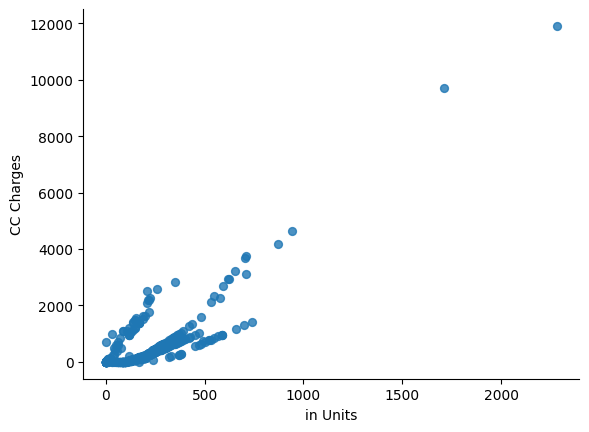

In [ ]:
from matplotlib import pyplot as plt
final.plot(kind='scatter', x='in Units', y='CC Charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

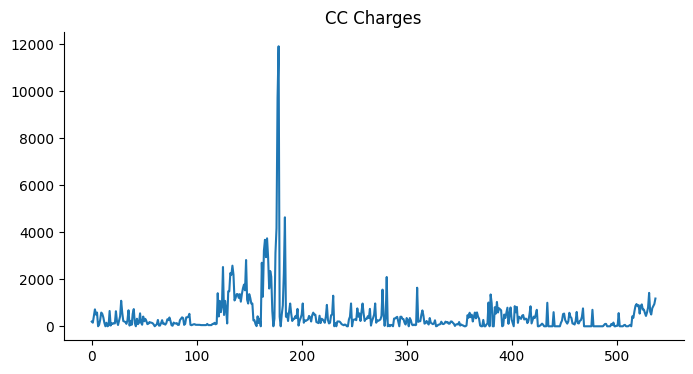

In [ ]:

from matplotlib import pyplot as plt
final['CC Charges'].plot(kind='line', figsize=(8, 4), title='CC Charges')
plt.gca().spines[['top', 'right']].set_visible(False)

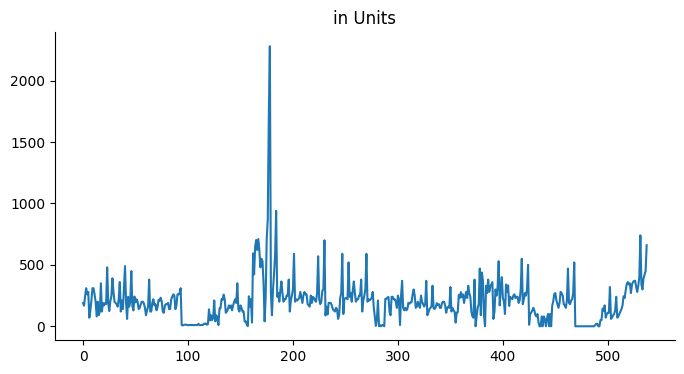

In [ ]:
from matplotlib import pyplot as plt
final['in Units'].plot(kind='line', figsize=(8, 4), title='in Units')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x = final.drop('in Units', axis = 'columns')
y = final['in Units']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(energy_data)

In [ ]:
column_name = 'in Units'
start_index = 0
end_index = 23


In [ ]:
filtered_values = df.loc[start_index:end_index, column_name]

In [ ]:
 threshold_consumer1= filtered_values.mean()
print("maximum values in the specified range:", threshold_consumer1)

maximum values in the specified range: 213.08333333333334


In [ ]:
threshold_consumer1

213.08333333333334

In [ ]:
column_name = 'in Units'
start_index = 24
end_index = 46

In [ ]:
filtered_values = df.loc[start_index:end_index, column_name]

In [ ]:
 threshold_consumer2= filtered_values.mean()
print("maximum values in the specified range:", threshold_consumer2)

maximum values in the specified range: 231.08695652173913


In [ ]:
threshold_consumer2

231.08695652173913

In [ ]:
column_name = 'in Units'
start_index = 47
end_index = 69

In [ ]:
filtered_values = df.loc[start_index:end_index, column_name]

In [ ]:
 threshold_consumer3= filtered_values.mean()
print("maximum values in the specified range:", threshold_consumer3)

maximum values in the specified range: 179.04347826086956


In [ ]:
threshold_consumer3

179.04347826086956

In [ ]:
column_name = 'in Units'
start_index = 70
end_index = 93

In [ ]:
filtered_values = df.loc[start_index:end_index, column_name]

In [ ]:
 threshold_consumer4= filtered_values.mean()
print("maximum  values in the specified range:", threshold_consumer4)

maximum  values in the specified range: 198.125


In [ ]:
threshold_consumer4

198.125

In [ ]:
column_name = 'in Units'
start_index = 94
end_index = 116

In [ ]:
filtered_values = df.loc[start_index:end_index, column_name]

In [ ]:
 threshold_consumer5= filtered_values.mean()
print("maximum values in the specified range:", threshold_consumer5)

maximum values in the specified range: 11.478260869565217


In [ ]:
threshold_consumer5

11.478260869565217

In [ ]:
theft_detected = False
for consumption in energy_data['in Units']:

    if consumption > threshold_consumer3:
        theft_detected = True
        break


if theft_detected:
    print("Theft has occurred in the  the consumption unit!")
else:
    print("No theft detected in the consumption unit !")

Theft has occurred in the  the consumption unit!


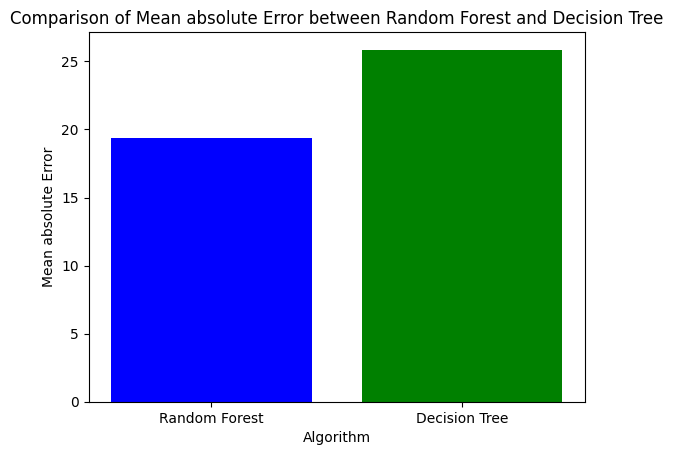

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

energy_data = pd.read_csv("/content/EB_Bill (1).csv")


x = final.drop('in Units', axis = 'columns')
y = final['in Units']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)


rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
rf_mse = mean_absolute_error(y_test, rf_pred)
dt_mse = mean_absolute_error(y_test, dt_pred)


labels = ['Random Forest', 'Decision Tree']
mse_values = [rf_mse, dt_mse]

plt.bar(labels, mse_values, color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Mean absolute Error')
plt.title('Comparison of Mean absolute Error between Random Forest and Decision Tree')
plt.show()

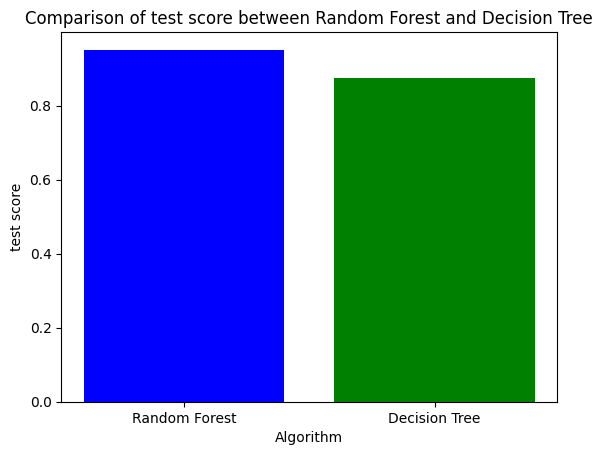

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

energy_data = pd.read_csv("/content/EB_Bill (1).csv")


x = final.drop('in Units', axis = 'columns')
y = final['in Units']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_model.score(x_test,y_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_model.score(x_test,y_test)


rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
rf_mse = rf_model.score(x_test,y_test)
dt_mse =dt_model.score(x_test,y_test)


labels = ['Random Forest', 'Decision Tree']
mse_values = [rf_mse, dt_mse]

plt.bar(labels, mse_values, color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('test score')
plt.title('Comparison of test score between Random Forest and Decision Tree')
plt.show()